<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

# <span style="color:red ">< header >Agent篇

## 可以逛一下https://www.kingstone.com.tw/robots.txt<br/>
---
### [何謂robots.txt](https://zh.wikipedia.org/wiki/Robots.txt)
```
大部分的網站都會在網站的最底層，放一個robots.txt
當作布告欄。

#允許所有網路爬蟲
User-agent: *
Disallow:

#攔截所有網路爬蟲
User-agent: *
Disallow:/


#攔截所有網路爬蟲拜訪特定目錄
User-agent: *
Disallow: /*.asp$
Disallow: /*.html$


```


# <span style="color:red ">讓我們用GET的方式來跟金石堂聊聊天

In [1]:
#我們來金石堂找本書看看
import requests
url='https://www.kingstone.com.tw/basic/2014230080709?zone=book&lid=home_act_prod2'
html=requests.get(url)
print(html.status_code)

400


<h2 ><font color=red>當我們單純用requests.get()來讀取網站資料的時候，伺服器會對我們阻擋，因為它知道你是隻蟲，不是人。</font></h2>

# <span style="color:orange ">這時候，header就是一個關鍵

<h2 ><font color=red>我們需要把自己偽裝成一個人</font></h2>
<h4>關鍵就是在前端加入<strong>headers表頭</strong></h4>
<h4>裡面最重要的欄位就是<strong>'User-Agent'</strong></h4>
<h4>我們會透過<strong>'User-Agent'</strong>來向網站表明身分</h4>

----
# [我不懂什麼是User-Agent啦!](https://progressbar.tw/posts/234)
    

In [4]:
#再訪金石堂
import requests
url='https://www.kingstone.com.tw/basic/2014230080709?zone=book&lid=home_act_prod2'
headers={'User-Agent':'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)'}
html=requests.get(url,headers=headers)
print(html.status_code)
#你可以看到Requests還是準備它的header，只是把我們的添加上去
print(html.request.headers)

200
{'User-Agent': 'Mozilla/4.0 (compatible; MSIE 5.5; Windows NT)', 'Accept-Encoding': 'gzip, deflate', 'Accept': '*/*', 'Connection': 'keep-alive'}


# <span style="color:red ">從Chrome裡面找到最好的User-agent設定

----
### 請在你的search Bar打" chrome://version/ "就知道了!
* Mozilla/5.0 (Windows NT 10.0; Win64; x64) 
* AppleWebKit/537.36 (KHTML, like Gecko) 
* Chrome/83.0.4103.97 
* Safari/537.36

# <span style="color:red ">fake_useragent的使用

----
## [爬蟲進化 – 偽裝篇 fake_useragent 介紹](https://weikaiwei.com/python/python-crawler-fake-useragent/)

In [1]:
!pip  install fake_useragent

  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13489 sha256=c2e560d5fb215a8e1b5b83c4af3f74a2de18af75a1f3162cc7c623941de4c83d
  Stored in directory: c:\users\fb-5231\appdata\local\pip\cache\wheels\a0\b8\b7\8c942b2c5be5158b874a88195116b05ad124bac795f6665e65
Successfully built fake-useragent


In [2]:
from fake_useragent import UserAgent
ua = UserAgent()
for i in range(5):
    print(ua.random)
    print('*-----------------*')

Error occurred during loading data. Trying to use cache server https://fake-useragent.herokuapp.com/browsers/0.1.11
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\fake_useragent\utils.py", line 154, in load
    for item in get_browsers(verify_ssl=verify_ssl):
  File "C:\ProgramData\Anaconda3\lib\site-packages\fake_useragent\utils.py", line 99, in get_browsers
    html = html.split('<table class="w3-table-all notranslate">')[1]
IndexError: list index out of range


Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/5.0)
*-----------------*
Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/31.0.1623.0 Safari/537.36
*-----------------*
Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/37.0.2049.0 Safari/537.36
*-----------------*
Mozilla/5.0 (Windows NT 6.2; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/29.0.1547.2 Safari/537.36
*-----------------*
Mozilla/5.0 (Windows; U; Windows NT 5.1; it-IT) AppleWebKit/533.20.25 (KHTML, like Gecko) Version/5.0.3 Safari/533.19.4
*-----------------*


## <span style="color:red ">< 小測驗 >金石堂再試一次!

## <span style="color:red ">< 答案 >

In [1]:
import requests
from fake_useragent import UserAgent

ua = UserAgent()
url='https://www.kingstone.com.tw/basic/2014230080709?zone=book&lid=home_act_prod2'
headers={'User-Agent':ua.random}
html=requests.get(url,headers=headers)
print(html.status_code)
#你可以看到Requests還是準備它的header，只是把我們的添加上去
print(html.headers)

200
{'Cache-Control': 'private', 'Content-Type': 'text/html; charset=utf-8', 'Server': '', 'Set-Cookie': 'ASP.NET_SessionId=z025jvna21ujpzdw2x4uh5zr; path=/; HttpOnly; SameSite=Lax, loginname=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, birthday=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, Email=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, bday=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, e_mail=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, custloginid=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, username=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; secure; SameSite=None, KSPW=; domain=kingstone.com.tw; expires=Tue, 03-Aug-2021 01:38:04 GMT; path=/; se

## <span style="color:red "><小測驗>蝦皮挑戰
-----
    來來來，麻煩你幫我設計一個function，讓我可以輸入我想要的商品關鍵字
    比如search('PS5')
    就可以讓蝦皮把相關資訊回傳給我
    

### <span style="color:red "><答案>

In [3]:
import requests
def search(target):
    url = 'https://shopee.tw/search'
    queries= {'keyword':target}
    r = requests.get(url, params=queries)
    return r.url,r.status_code,r.text
    
print(search('ps5'))

('https://shopee.tw/search?keyword=ps5', 200, '<!doctype html>\n<html>\n<head>\n<link rel="preconnect" href="//cf.shopee.tw/">\n<link rel="preconnect" href="//deo.shopeemobile.com/shopee/">\n<link rel="preconnect" href="//cv.shopee.tw/">\n<meta charset="utf-8">\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=1,minimum-scale=1,user-scalable=no,viewport-fit=cover">\n<meta name="shopee:git-sha" content="9e475ac731e4bd98f0437b51c74edbb32101300b">\n<meta name="shopee:version" content="rw-v3.87.1">\n<script>\nwindow.__PAGE_ID__ = 12;\n        window.__LOCALE__ = \'TW\';\n        window.__ENV__ = \'live\';\n        window.__ASSETS__ = {"CCMS_FEATURE_TOGGLE":{"ALL_CATEGORIES_HOMEPAGE_ENTRANCE":{"default":false,"TW":true,"VN":true,"PH":true,"MY":true,"ID":true},"AMP_CATEGORY_PAGE":{"default":true},"BUNDLE_DEALS":{"default":true},"BUNDLE_DEAL_11":{"default":true},"COMMENT_BUTTON_WHITELIST":{"default":[{"username":"shopeesg","userid":11918,"shopid":11918},{"userna

# <span style="color:red ">< 小測驗 > 蝦皮不給爬事件
---
    蝦皮透過下面的程序，我們爬了，但是沒有東西。

In [ ]:
import requests
def search(target):
    url = 'https://shopee.tw/search'
    queries= {'keyword':target}
    r = requests.get(url, params=queries)
    return r.url,r.status_code,r.text
    
print(search('ps5'))

# <span style="color:red ">< 答案 >
----
關鍵在User Agent，只給Googlebot爬  
[連結](https://shopee.tw/robots.txt)

In [ ]:
import requests
from fake_useragent import UserAgent
ua = UserAgent()
def search(target):
    url = 'https://shopee.tw/search'
    queries= {'keyword':target}
    headers = {
    'User-Agent': 'Googlebot',
    }
    r = requests.get(url,headers=headers, params=queries)
    return r.url,r.history,r.status_code,r.text
    
print(search('ps5'))

# <span style="color:red ">< header >Referer篇
----
## [範例網頁](http://www.webscrapingfordatascience.com/referercheck/)==>你應該可以看到秘密網頁
----
## [直接點秘密網頁](http://www.webscrapingfordatascience.com/referercheck/secret.php)==>啥咪??
----
    那這樣你要怎麼爬秘密網頁??

# <span style="color:orange ">如果爬的過程，無法獲得你要的結果，先用瀏覽器打開網頁，看看header的變化。

## <span style="color:red ">< 小測驗 >嘗試幫我解決一下，看怎麼樣可以進入??

## <span style="color:red ">< 答案 >

In [2]:
import requests
url = 'http://www.webscrapingfordatascience.com/referercheck/secret.php'

my_headers = {
'Referer': 'http://www.webscrapingfordatascience.com/referercheck/'
}
r = requests.get(url, headers=my_headers)
print(r.text)

This is a totally secret page


# <span style="color:red ">< redirection >重新導向
----
## [參考網頁](http://www.webscrapingfordatascience.com/redirect/)
----
    1.從develop tool裡面的觀察，你是先獲得一個302 status code
    2.這個302會告訴你的瀏覽器，要發出第二個request去找“destination.php”URL

In [2]:
import requests
url = 'http://www.webscrapingfordatascience.com/redirect/'
r = requests.get(url)
print(r.text)
print(r.headers)

Hello, there -- you've been redirected here from another page!

{'Date': 'Mon, 01 Feb 2021 09:11:05 GMT', 'Server': 'Apache/2.4.41 (Ubuntu)', 'Content-Length': '64', 'Keep-Alive': 'timeout=5, max=99', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=UTF-8'}


## <span style="color:orange ">但是等等，我要的資料是在第一目的地，我不想被redirect啊!
-----
    在原本的網頁裡面帶有秘密資訊，我如果被轉向，我就一直看不到了，  
    用allow_redirects把預設轉向的行為關掉

In [3]:
import requests
url = 'http://www.webscrapingfordatascience.com/redirect/'
r = requests.get(url, allow_redirects=False)
print(r.text)
print(r.headers)

You will be redirected... bye bye!
{'Date': 'Mon, 01 Feb 2021 09:11:28 GMT', 'Server': 'Apache/2.4.41 (Ubuntu)', 'SECRET-CODE': '1234', 'Location': 'http://www.webscrapingfordatascience.com/redirect/destination.php', 'Content-Length': '34', 'Keep-Alive': 'timeout=5, max=100', 'Connection': 'Keep-Alive', 'Content-Type': 'text/html; charset=UTF-8'}


# <span style="color:red ">< authentication >聊聊401 (“Unauthorized”) status code
----
## [參考網頁](http://www.webscrapingfordatascience.com/authentication/)
----
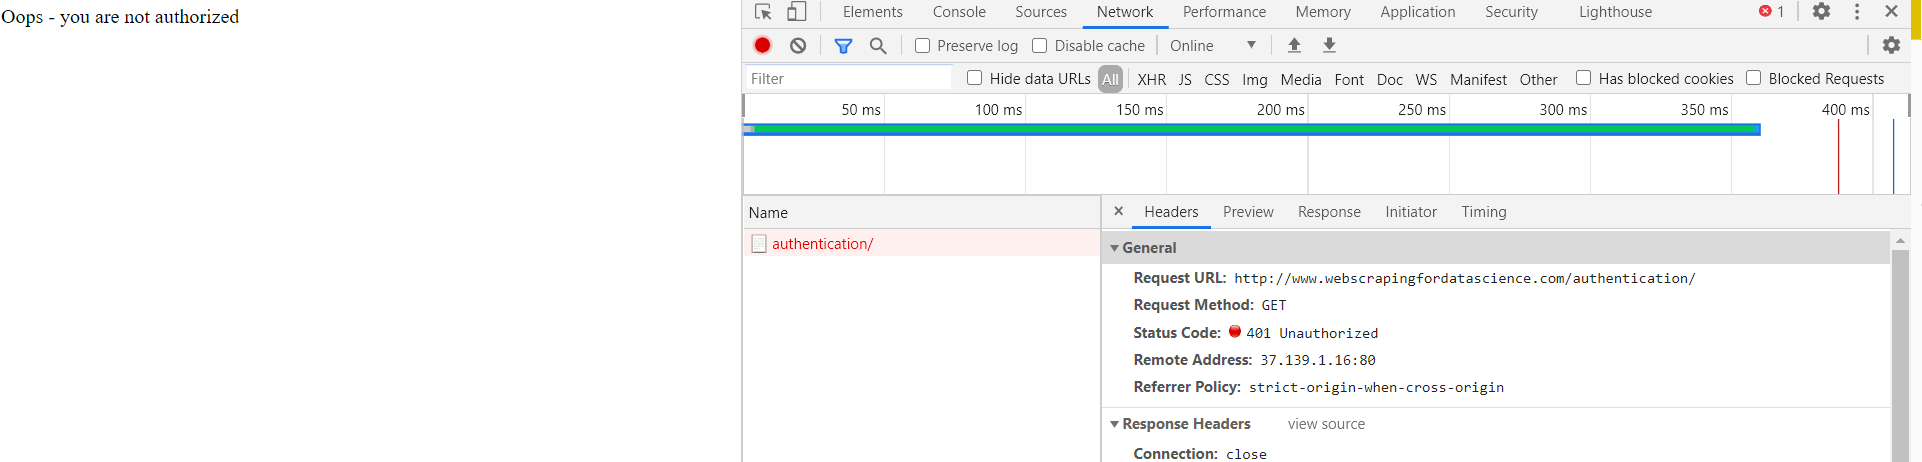

## <span style="color:orange ">填了帳號、密碼再上
-----
    用auth填寫帳號密碼

In [ ]:
import requests
url = 'http://www.webscrapingfordatascience.com/authentication/'
r = requests.get(url, auth=('myusername', 'mypassword'))
print(r.text)
print(r.request.headers)

# <span style="color:red ">< cookie >
-------
    基本上的HTTP 的協議本身是「無記憶狀態 (Stateless) 」的。
    整個transaction完成以後，誰是誰都不記得。
    但是你想像一個狀態
    你在產品頁面，放東西進購物車，
    然後你到結帳畫面去，難道要你的客人再挑一次產品嗎?
    那他應該走了。

# <span style="color:red ">認識Cookie
--------
      很多網站在你瀏覽網頁之後，會在你的電腦系統中留下一些小小的檔案，
      也就是所謂的 Cookie。當你再去瀏覽這些網站時，
      系統便會去讀取這些 Cookie 再更新儲存一遍。

      Cookie 不是「餅乾」，Cookie 是伺服器暫存在你電腦上的一筆資料，
      好讓伺服器用來辨認你的電腦。就好比是格林童話故事中，沿途撒下麵包屑避免在森林中迷路的小孩。



##    [Session與Cookie差別](https://medium.com/tsungs-blog/day14-session%E8%88%87cookie%E5%B7%AE%E5%88%A5-eb7b4035a382)

# <span style="color:red ">Cookie怎麼用

-------
Response的時候，server會送回下面的檔案
    
    HTTP/1.1 200 OK
    Content-type: text/html
    Set-Cookie: sessionToken=20495; Expires=Wed, 09 Jun 2021 10:10:10 GMT
    Set-Cookie: siteTheme=dark
    [...]
-----
    1.header加入Set-Cookie
    2.cookie name 和 cookie value-
       會用=號連接成一組
       sessionToken=20495可能標註讀到哪一頁
       siteTheme=dark可能標註客人喜歡的網站配色
    3.如果有多個cookie值，就用;號分開

# <span style="color:red ">< Cookie >做個實驗
----
## [網頁點我](http://www.webscrapingfordatascience.com/cookielogin/)
----
## 看到秘密網頁以後，如果你COPY網址，用另一個伺服器打開，可以打開嗎??

# <span style="color:red ">< Cookie >同理，不掛Cookie，可以爬嗎?

In [4]:
import requests
url = 'http://www.webscrapingfordatascience.com/cookielogin/secret.php'
r = requests.get(url)
print(r.text)

Hmm... it seems you are not logged in


# <span style="color:red ">< Cookie >加掛Cookie，出發

In [6]:
import requests
url = 'http://www.webscrapingfordatascience.com/cookielogin/secret.php'
my_cookies = {'PHPSESSID': 'tn537ukik6pnh8oqinct9t9gqj'}
r = requests.get(url, cookies=my_cookies)
print(r.text)

This is a secret code: 1234


## <span style="color:orange ">可以了!!但是說實話，我不知道這個密碼會不會改變，多久會改變??

# <span style="color:red ">< 小測驗 >硬Key的code，不會是好code，可以幫我做一個可以自動更新內容的Smart Cookie嗎?

# <span style="color:red ">< 答案 >還是要一鼓作氣解決

In [ ]:
#因為cookie會跳號啦!!
import requests
url = 'http://www.webscrapingfordatascience.com/cookielogin/'

# post連線
r = requests.post(url, data={'username': 'dummy', 'password': '1234'})

# response裡面有cookie
print(r.cookies)

#配上cookie再上
r = requests.get(url + 'secret.php', cookies=r.cookies)
print(r.request.url)
print(r.text)

# <span style="color:red ">< 小測驗 >嘿嘿!既然你已經會處理cookie了!!-談Redirect
-----
## [連結](http://www.webscrapingfordatascience.com/redirlogin/)
    
    那幫我爬一下下面網址
    http://www.webscrapingfordatascience.com/redirlogin/
    取得 secret code

# <span style="color:red ">< 答案 >不要把我亂帶去別的地方
-----
### 依照下列方法觀察
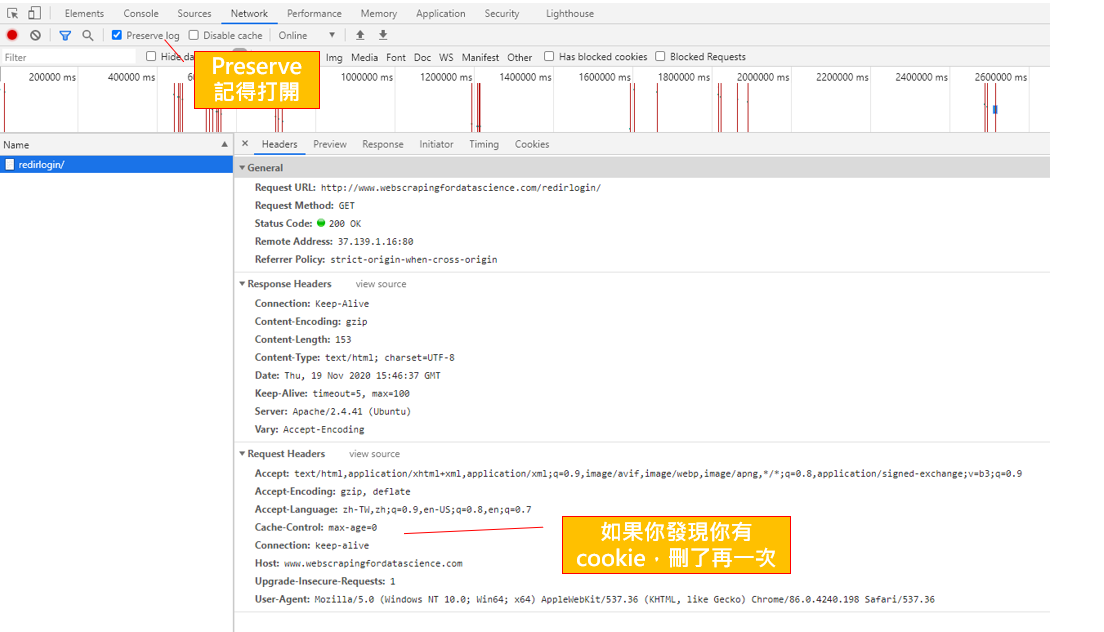

In [7]:
import requests
url = 'http://www.webscrapingfordatascience.com/redirlogin/'

#  post連線
# 關鍵就是如果你被redirect了，你就拿不到那個cookie，那你到第二站，就進不去了!!
r = requests.post(url, data={'username': 'dummy', 'password': '1234'},allow_redirects=False)

# response裡面有cookie
print(r.cookies)

#配上cookie再上
r = requests.get(url + 'secret.php', cookies=r.cookies)
print(r.text)

<RequestsCookieJar[<Cookie PHPSESSID=kq9elasklb24fsprc42mpsdta3 for www.webscrapingfordatascience.com/>]>
This is a secret code: 1234


# <span style="color:red ">< 小測驗 >再來一題
-----

## [連結](http://www.webscrapingfordatascience.com/trickylogin/) 
    那幫我爬一下下面網址
    http://www.webscrapingfordatascience.com/trickylogin/
    取得 secret code

# <span style="color:red ">< 答案 >我只能說這就是爬蟲人生
-----
    1.你永遠要記得，防爬蟲最高竿的作法，就是在redirect的過程中，給你偷換cookie，你沒注意就被騙了!!  
    2.還要注意一下，request裡面有沒有被偷藏東西

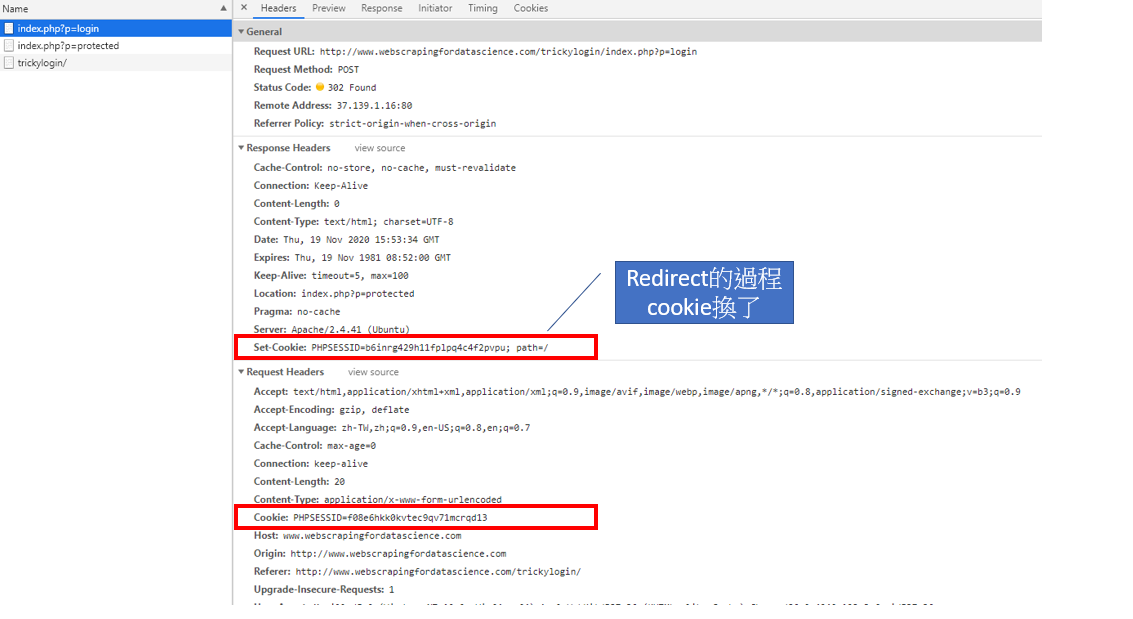

In [6]:
import requests
url = 'http://www.webscrapingfordatascience.com/trickylogin/'
# 你要先開一次
r = requests.get(url)
# 拿到這個cookie，這是為了證明你是真的開了網頁來登入的
my_cookies = r.cookies
print('我是第一個cookie\n',my_cookies)


#把前面拿到的cookie和登入資訊，進行login
#沒有加params={'p': 'login'}過不了
r = requests.post(url, params={'p': 'login'},
                  data={'username': 'dummy', 'password': '1234'},
                  allow_redirects=False,
                  cookies=my_cookies)
#你要更新你的cookie資料，因為資料換了
my_cookies = r.cookies
print('我是第二個cookie\n',my_cookies)


#拿著新cookie，再連一次
#沒有加{'p': 'protected'}過不了
r = requests.get(url, params={'p': 'protected'}, cookies=my_cookies)
print('密碼是\n',r.text)


我是第一個cookie
 <RequestsCookieJar[<Cookie PHPSESSID=2ls3ftgpf8biqqas5ls286pecf for www.webscrapingfordatascience.com/>]>
我是第二個cookie
 <RequestsCookieJar[<Cookie PHPSESSID=r82o8oagm1q3tg8djfu0ioj50h for www.webscrapingfordatascience.com/>]>
密碼是
 Here is your secret code: 3838.


# <span style="color:red ">requests就是知道你的痛苦
-----
    1.Session()出動==>他會幫你處理後台所有cookie發生的一切事情。
    2.讓你跟server的溝通，完全彷彿就是一個真人  

# <span style="color:red ">剛剛那題兩塊餅乾(兩塊cookie)的問題，再來一次

In [1]:
import requests
url = 'http://www.webscrapingfordatascience.com/trickylogin/'
my_session = requests.Session()
r = my_session.get(url)
r = my_session.post(url, params={'p': 'login'},
                    data={'username': 'dummy', 'password': '1234'})

r = my_session.get(url, params={'p': 'protected'})
print(r.text)

Here is your secret code: 3838.


# <span style="color:red ">有Session()，有沒有覺得老師，你前面廢話那麼多幹嘛?
    

# <span style="color:red ">Session()還可以做更多
-----
    1.Session()除了可以讓你的request連貫起來
    2.還記得“User-Agent”嗎? 類似這種的global header fields，一次設定，萬家用
    

In [ ]:
import requests
from fake_useragent import UserAgent

ua = UserAgent()
url = 'http://www.webscrapingfordatascience.com/trickylogin/'
my_session = requests.Session()
#把agent設定進來
my_session.headers.update({'User-Agent': ua.random})

#開始用這個我們設定好的session開始作業:
r = my_session.post(url)
print(r.request.headers)
print(r.status_code)

r = my_session.post(url, params={'p': 'login'},
data={'username': 'dummy', 'password': '1234'})
print(r.request.headers)
print(r.status_code)

r = my_session.get(url, params={'p': 'protected'})
print(r.request.headers)
print(r.status_code)